![iNeuron Logo](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTRLLj3Vw3ASLxRes0gT0QysvPrQ2Vy3uSC4IAWEjb3&s)

# Finance Complaint Project

## Exploratory Data Analysis

### Problem Statement

The Consumer Financial Protection Bureau (CFPB) is a federal U.S. agency that acts as a mediator when disputes arise between financial institutions and consumers. Via a web form, consumers can send the agency a narrative of their dispute.

This project made using Natural Language Processing (NLP) with machine learning models to process the issues text written in the complaint and other features in the dataset to predict if the customer will dispute or not.

**Industry use case:** An NLP + Machine learning model would make the classification of whether the consumer will dispute with the companty or not and thus helping the company to prioritize the complaint based on the prediction.

**Importing Required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option('display.max_columns', 50)



-  Most of the companies even though they solved the issue and responded to both customer and CFPB they choose not to provide public respose. That can be a reason why consumer disputed response data is not publicly available This justifies the N/A values in target column.
- So while downloading the data N/A were removed

**Import the Parquet file as Pandas DataFrame**

In [2]:
df = pd.read_parquet('data/finance.parquet')

**Show Top 5 Records**

In [3]:
df.head()

,company,company_public_response,company_response,complaint_id,complaint_what_happened,consumer_consent_provided,consumer_disputed,date_received,date_sent_to_company,issue,product,state,sub_issue,sub_product,submitted_via,tags,timely,zip_code
0,CAPITAL ONE FINANCIAL CORPORATION,None,Closed with explanation,2417725,,Consent not provided,No,2017-04-05T12:00:00-05:00,2017-04-05T12:00:00-05:00,Disclosure verification of debt,Debt collection,TX,Not given enough info to verify debt,Auto,Web,None,Yes,77093
1,"EQUIFAX, INC.",None,Closed with explanation,2425095,,Consent not provided,No,2017-04-07T12:00:00-05:00,2017-04-07T12:00:00-05:00,Incorrect information on credit report,Credit reporting,VA,Account status,None,Web,None,Yes,23113
2,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Company has responded to the consumer and the ...,Closed with explanation,2425690,Updated case number XXXX. I have been writting...,Consent provided,No,2017-04-07T12:00:00-05:00,2017-04-07T12:00:00-05:00,Credit reporting company's investigation,Credit reporting,TX,Investigation took too long,None,Web,None,Yes,75035
3,Santander Consumer USA Holdings Inc.,None,Closed with explanation,2417087,I co-signed for an auto loan XX/XX/XXXX for a ...,Consent provided,Yes,2017-04-03T12:00:00-05:00,2017-04-03T12:00:00-05:00,Problems when you are unable to pay,Consumer Loan,NC,None,Vehicle loan,Web,None,Yes,28212
4,"Fidelity National Information Services, Inc. (...",Company has responded to the consumer and the ...,Closed with explanation,2357620,,Consent not provided,No,2017-02-23T12:00:00-05:00,2017-02-28T12:00:00-05:00,Incorrect information on credit report,Credit reporting,CA,Information is not mine,None,Web,None,Yes,95945


**Unique values in target column** 

In [4]:
df.consumer_disputed.value_counts(normalize=True)*100

No     80.701903
Yes    19.298097
Name: consumer_disputed, dtype: float64

**Shape of the dataset**

In [5]:
df.shape

(767656, 18)

#### As we can see `complaint_what_happened` has empty strings which can be converted to np.nan

In [6]:
df.replace('', np.nan, inplace=True)

**Summary of the dataset**

In [7]:
# Display summary statistics for a dataframe
df.describe().T

,count,unique,top,freq
company,767656,4284,"BANK OF AMERICA, NATIONAL ASSOCIATION",65534
company_public_response,196044,10,Company has responded to the consumer and the ...,95657
company_response,767656,7,Closed with explanation,579257
complaint_id,767656,765945,1723008,2
complaint_what_happened,164343,160968,I am filing this complaint because Experian ha...,103
consumer_consent_provided,767618,5,N/A,469214
consumer_disputed,767656,2,No,619513
date_received,767656,1940,2017-01-19T12:00:00-05:00,2070
date_sent_to_company,767656,2024,2017-01-19T12:00:00-05:00,1614
issue,767656,99,"Loan modification,collection,foreclosure",111899


#### Check the unique values of our target column

In [8]:
df.consumer_disputed.value_counts(normalize=True)*100

No     80.701903
Yes    19.298097
Name: consumer_disputed, dtype: float64

**Check Datatypes in the dataset**

In [9]:
# Check Null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767656 entries, 0 to 767655
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   company                    767656 non-null  object
 1   company_public_response    196044 non-null  object
 2   company_response           767656 non-null  object
 3   complaint_id               767656 non-null  object
 4   complaint_what_happened    164343 non-null  object
 5   consumer_consent_provided  767618 non-null  object
 6   consumer_disputed          767656 non-null  object
 7   date_received              767656 non-null  object
 8   date_sent_to_company       767656 non-null  object
 9   issue                      767656 non-null  object
 10  product                    767656 non-null  object
 11  state                      762006 non-null  object
 12  sub_issue                  313783 non-null  object
 13  sub_product                533197 non-null  

## 3. EXPLORING DATA

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 0 numerical features : []

We have 18 categorical features : ['company', 'company_public_response', 'company_response', 'complaint_id', 'complaint_what_happened', 'consumer_consent_provided', 'consumer_disputed', 'date_received', 'date_sent_to_company', 'issue', 'product', 'state', 'sub_issue', 'sub_product', 'submitted_via', 'tags', 'timely', 'zip_code']


- Here we have only categorical columns in the dataset

### Checking Null values

In [11]:
missing = df.isnull().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
missing

,0
tags,85.884302
complaint_what_happened,78.591583
company_public_response,74.461999
sub_issue,59.124530
sub_product,30.542196
state,0.736007
zip_code,0.735616
consumer_consent_provided,0.004950
timely,0.000000
submitted_via,0.000000


In [12]:
drop_columns = ['tags','complaint_what_happened','company_public_response','sub_issue','sub_product','zip_code','complaint_id']
df.drop(drop_columns, axis=1, inplace=True)

#### Number of unique values in each column 

In [13]:
for col in df.columns:
    print(col,df[col].nunique())

company 4284
company_response 7
consumer_consent_provided 5
consumer_disputed 2
date_received 1940
date_sent_to_company 2024
issue 99
product 13
state 62
submitted_via 6
timely 2


## Visualization

### 4.1 Visualize the Target Feature (Customer Disputed)

- **Whether the consumer disputed the company’s response.**

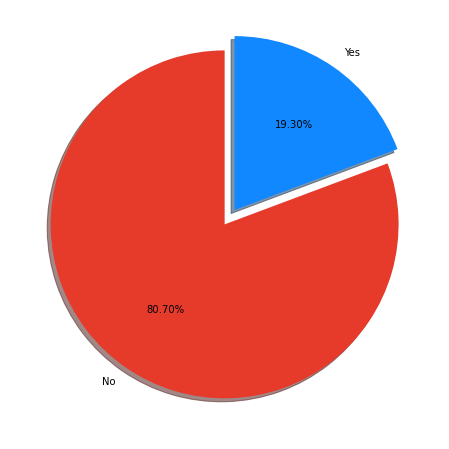

In [14]:
percentage = df.consumer_disputed.value_counts(normalize=True)*100
label = ["No", "Yes"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#e63a2a','#1188ff' ]
ax.pie(percentage, labels = label, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

- From the chart it is clear that the Target Variable is Imbalanced

**What is imbalanced data?**

- Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here number of Not-stroke has more count than the number of stroke of the dataset.

## Products on which the complaints were made.

- **The type of product the consumer identified in the complaint.**

In [156]:
# Percentage of each Top 10 product
product_percentage.to_frame()[0:10]

,product
Mortgage,29.454990
Debt collection,19.040039
Credit reporting,18.335947
Credit card,11.481445
Bank account or service,11.254129
Student loan,4.245261
Consumer Loan,4.124894
Payday loan,0.724804
Money transfers,0.699141
Prepaid card,0.498531


**Visualize product percentage in a pie chart**

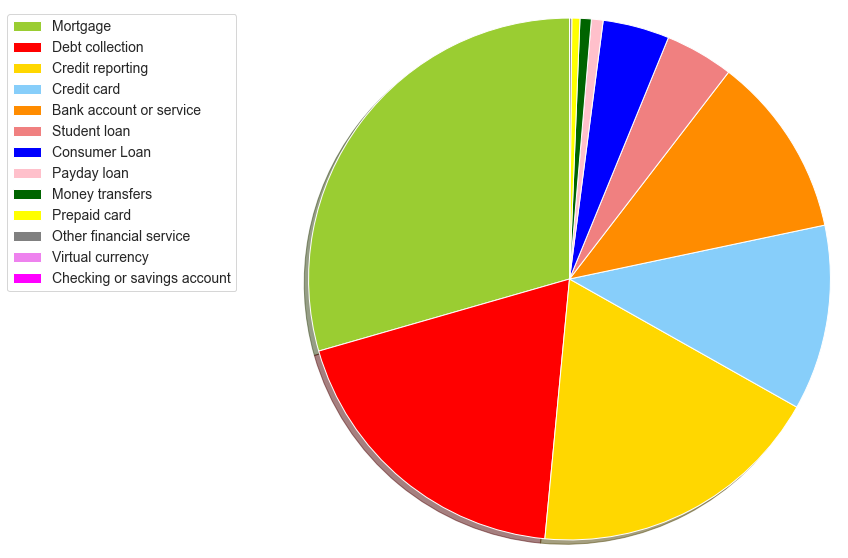

In [150]:
product_percentage = df['product'].value_counts(normalize=True)*100
product_labels = product_percentage.index
colors = ['yellowgreen','red','gold','lightskyblue','darkorange','lightcoral','blue',
          'pink', 'darkgreen','yellow','grey','violet','magenta','cyan']

fig, ax = plt.subplots(figsize =(18, 10))
patches, texts = ax.pie(product_percentage, startangle = 90, shadow=True, colors=colors,radius=1.2)

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=14)
plt.show()

**Insights**
- Mortgage Product had the most finance complaints product which is 29% of total.
- It is followed by debt collection product which is 19% of total.

### States in US and their impact on target feature

- **The state of the mailing address provided by the consumer.**

In [168]:
top_states = df.state.value_counts(normalize=True)[0:10]*100
top_states.to_frame()

,state
CA,14.490831
FL,9.644412
TX,7.797445
NY,6.883935
GA,4.754818
NJ,4.002724
IL,3.696690
PA,3.610995
VA,3.214542
MD,3.152206


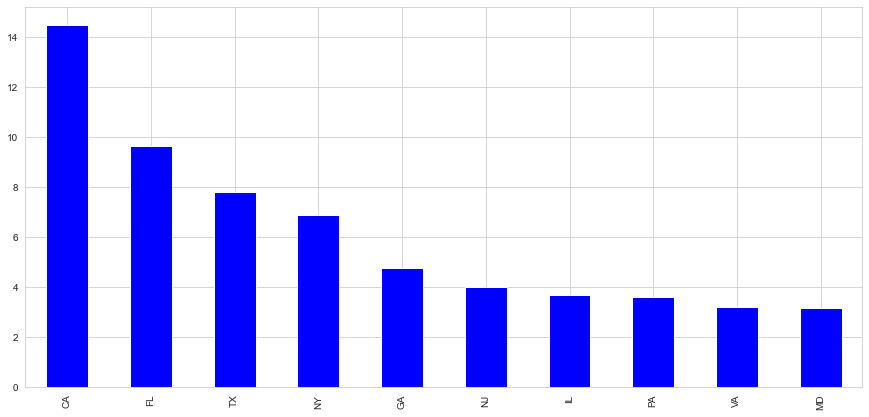

In [181]:
plt.subplots(figsize=(15,7))
top_states.plot(kind='bar', color='blue');

**Insights**
- California has the highest number of complaints registered which is 14.4% of the total complaints
- Then Followed by Florida with 9.6%

### Company's Response and its effect on Target feature

- **The company’s mandatory response for the particular complaint**

In [34]:
df.groupby('company_response')['consumer_disputed'].value_counts(normalize=True).to_frame()*100

consumer_disputed
company_response                consumer_disputed                   
Closed                          No                         79.429089
                                Yes                        20.570911
Closed with explanation         No                         78.770390
                                Yes                        21.229610
Closed with monetary relief     No                         89.402829
                                Yes                        10.597171
Closed with non-monetary relief No                         88.370391
                                Yes                        11.629609
Closed with relief              No                         86.306965
                                Yes                        13.693035
Closed without relief           No                         73.108773
                                Yes                        26.891227
Untimely response               No                         99.965434
                                Yes                         0.034566

**Proportion of consumer who has disputed and Company's response**

In [69]:
dispute_df=df.loc[df.consumer_disputed == 'Yes']
dispute_df.company_response.value_counts(normalize=True).to_frame()*100

,company_response
Closed with explanation,83.010335
Closed with non-monetary relief,7.509636
Closed with monetary relief,3.682253
Closed without relief,2.915426
Closed,2.451685
Closed with relief,0.429990
Untimely response,0.000675


**Visualization**

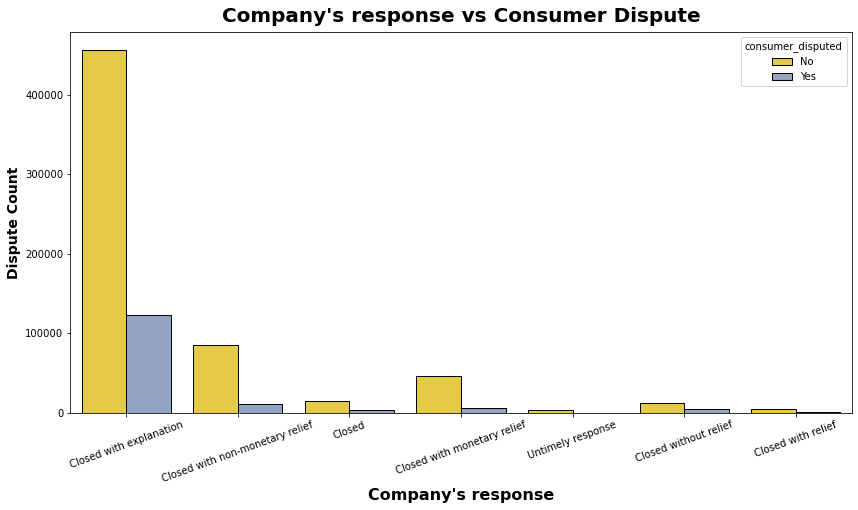

In [47]:
plt.subplots(figsize=(14,7))
sns.countplot(x="company_response",hue="consumer_disputed", data=df,ec = "black",palette="Set2_r")
plt.title("Company's response vs Consumer Dispute", weight="bold",fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Company's response", weight="bold", fontsize=16)
plt.xticks(rotation=20);

**Insights**
- From the above report, the insight is most of the finance complaints where company's response is `Closed with explanation` has 84% of consumers dispute.

### Finance Complaint Year and Disputed Consumer's count
- **The Year the CFPB received the complaint**.

- As this is the imbalanced data. visualizing only the data in which consumer has dispute on the company's response

In [88]:
# create a copy of dispute consumer data
viz_df = dispute_df.copy()
viz_df['received_date']= pd.to_datetime(viz_df['date_received']).dt.date
viz_df['received_month'] = pd.to_datetime(viz_df['received_date']).dt.month
viz_df['received_year'] = pd.to_datetime(viz_df['received_date']).dt.year

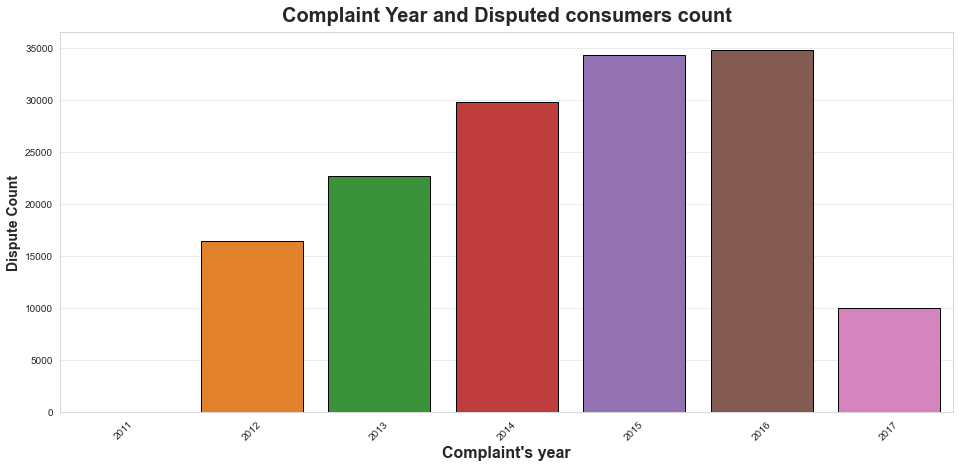

In [90]:
plt.subplots(figsize=(16,7))
sns.countplot(x="received_year",data= viz_df,ec = "black")
plt.xticks(rotation=45)
plt.title("Complaint Year and Disputed consumers count", weight="bold",fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Complaint's year", weight="bold", fontsize=16)
plt.grid(alpha = 0.5,axis = "y")
plt.show()

**Insights**
- Complaints were Highest on 2016 and 2015
- Complaints were Least on 2017 and 2011

### Finance Complaint Month and Disputed Consumer's count
- **The Month the CFPB received the complaint**.

**Map the Numerical months as month names**

In [93]:
map_months = {1 : 'January', 2 : 'February', 3: 'March', 4 : 'April', 5: 'May', 6:'June', 7:'July', 8:'August',9:'September',
       10:'October', 11:'November', 12: 'December'}
viz_df=viz_df.replace({"received_month": map_months})

**Plot the months against the dispute data count**

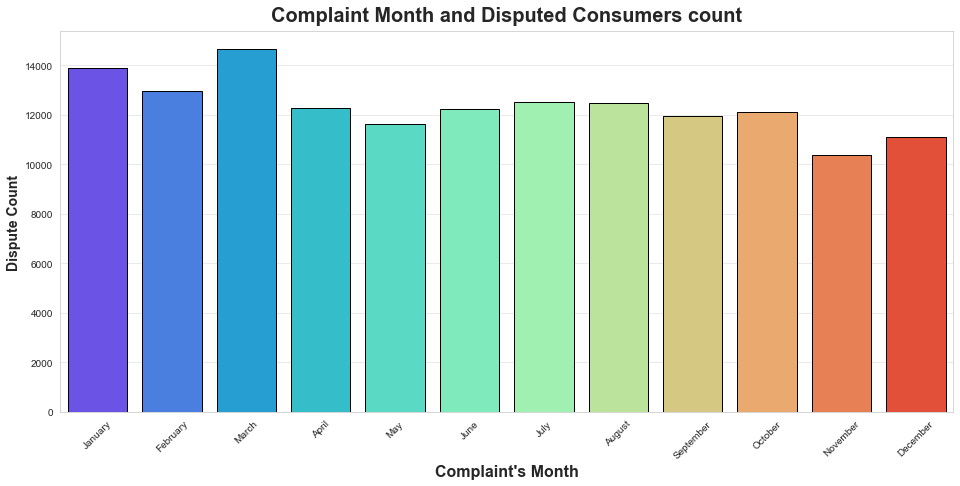

In [94]:
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", 
                "September", "October", "November", "December"]
plt.subplots(figsize=(16,7))
sns.countplot(x="received_month",data= viz_df,ec = "black", palette='rainbow',order=months_order)
plt.xticks(rotation=45)
plt.title("Complaint Month and Disputed Consumers count", weight="bold",fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Complaint's Month", weight="bold", fontsize=16)
plt.grid(alpha = 0.5,axis = "y")
plt.show()

**Insights**
- Month of March had recieved more complaints than anyother month 
- Q1 of the year had more financial complaints

In [15]:
df.head()

,company,company_response,consumer_consent_provided,consumer_disputed,date_received,date_sent_to_company,issue,product,state,submitted_via,timely
0,CAPITAL ONE FINANCIAL CORPORATION,Closed with explanation,Consent not provided,No,2017-04-05T12:00:00-05:00,2017-04-05T12:00:00-05:00,Disclosure verification of debt,Debt collection,TX,Web,Yes
1,"EQUIFAX, INC.",Closed with explanation,Consent not provided,No,2017-04-07T12:00:00-05:00,2017-04-07T12:00:00-05:00,Incorrect information on credit report,Credit reporting,VA,Web,Yes
2,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Consent provided,No,2017-04-07T12:00:00-05:00,2017-04-07T12:00:00-05:00,Credit reporting company's investigation,Credit reporting,TX,Web,Yes
3,Santander Consumer USA Holdings Inc.,Closed with explanation,Consent provided,Yes,2017-04-03T12:00:00-05:00,2017-04-03T12:00:00-05:00,Problems when you are unable to pay,Consumer Loan,NC,Web,Yes
4,"Fidelity National Information Services, Inc. (...",Closed with explanation,Consent not provided,No,2017-02-23T12:00:00-05:00,2017-02-28T12:00:00-05:00,Incorrect information on credit report,Credit reporting,CA,Web,Yes


## Complaints Submission

- **How the complaint was submitted to the CFPB. For example, “Web” or “Phone.”**

In [186]:
df.submitted_via.value_counts(normalize=True).to_frame()*100

,submitted_via
Web,68.106678
Referral,17.289515
Phone,6.782986
Postal mail,6.349719
Fax,1.426941
Email,0.044160


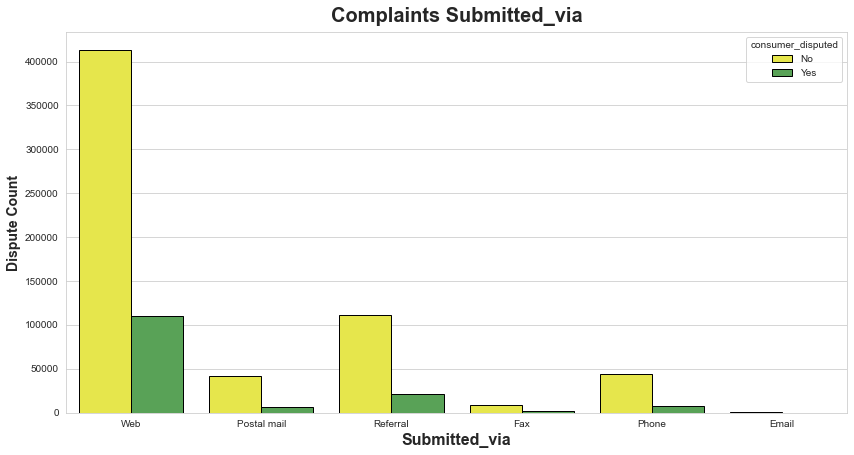

In [183]:
plt.subplots(figsize=(14,7))
sns.countplot(x="submitted_via",hue="consumer_disputed", data=df,ec = "black",palette="Set1_r")
plt.title("Complaints Submitted_via", weight="bold",fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Submitted_via", weight="bold", fontsize=16);

**Insights**
- 68% of total complaints were submmited via Web.
- Second most used platflorm to submit is Referral then followed by Phone

### Timely response has any effect on Target column

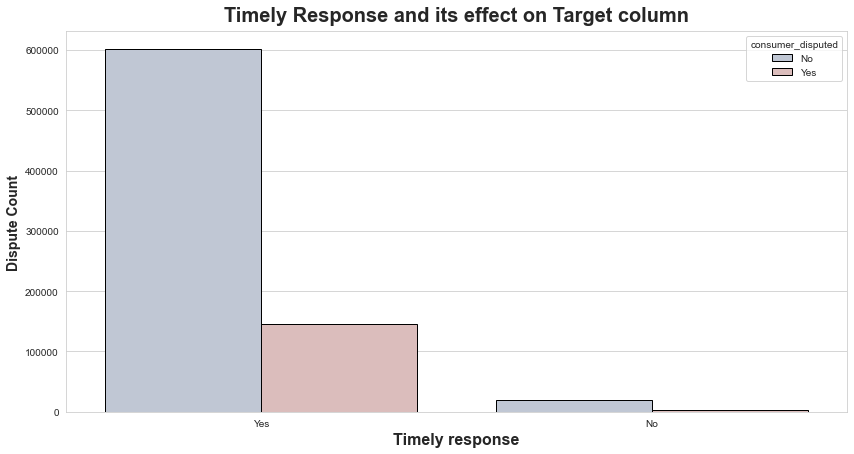

In [193]:
plt.subplots(figsize=(14,7))
sns.countplot(x="timely",hue="consumer_disputed", data=df,ec = "black",palette="vlag")
plt.title("Timely Response and its effect on Target column", weight="bold",fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Timely response", weight="bold", fontsize=16);

**Insights**
- Most of the complaints which had timely response also had consumer disputed
- No much impact on target column

### Consumer consent provided and its effect on Target column

- here consent provided columns is approval given by the consumer on publishing their complaints public

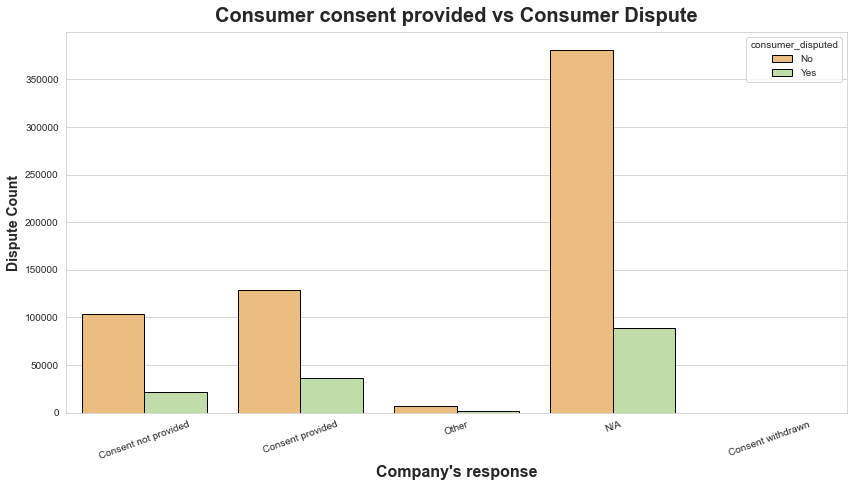

In [84]:
plt.subplots(figsize=(14,7))
sns.countplot(x="consumer_consent_provided",hue="consumer_disputed", data=df,ec = "black",palette="Spectral")
plt.title("Consumer consent provided vs Consumer Dispute", weight="bold",fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Consent Provided", weight="bold", fontsize=16)
plt.xticks(rotation=20);

**Insights**
- Most of the Record here is not available `N/A`.
- Consent Provided has more impact on the target variable, because most consumer wanted complaints to be public.

## Final Report
- Dataset is collected from consumerfinance US government website.
- `tags`,`complaint_what_happened`,`company_public_response`,`sub_issue`,`sub_product`,`zip_code`,`complaint_id` are the columns which can be removed as they are redundant or doesn’t help the model.
- `company` its a name column can be removed as it contains 4284 unique values, which cannot be used in model.
- new feature can be created `days_to_forward_complaint` which is the difference between `date_sent_to_company`-`date_received`.
- `issue` column is a text column, so text processing can be done and vectorized by tfidf for the model training.
- Null values can be imputed with mode.